In [1]:
# Gerekli kütüphaneleri yüklüyoruz
from sklearn.datasets import load_iris
import pandas as pd


In [2]:
def load_and_describe_iris():
    """
    IRIS veri setini yükleyip pandas DataFrame'e dönüştüren bir fonksiyon.
    Aynı zamanda veri setinin istatistiksel özetini (mean, std, min, max) döner.

    Geri dönen:
        pd.DataFrame: Veri setinin istatistiksel özeti
    """
    # IRIS veri setini yükle
    iris = load_iris()
    
    # Veri setini pandas DataFrame formatına çevir
    iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
    
    # Sınıf etiketlerini ekleyelim
    iris_df['species'] = iris.target
    
    # Temel istatistiksel özet
    summary = iris_df.describe()
    
    return summary

# Fonksiyonu çalıştırarak özet tabloyu gösterelim
iris_summary = load_and_describe_iris()
iris_summary


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Adım 3: Veriyi Görselleştirmek
Şimdi, veriyi anlamak için bazı grafikler çizelim. Jupyter Notebook'ta görsellerle veri analizi yapmak oldukça yaygındır. Aşağıdaki görselleştirmeleri yapacağız:

Boxplot (kutu grafiği)
Histogram
Scatter plot (saçılım grafiği)
Kutu Grafiği (Boxplot)
Kutu grafiği, verinin dağılımını anlamada yardımcı olur. Verideki çeyreklikler, medyan ve uç değerleri görmemizi sağlar.

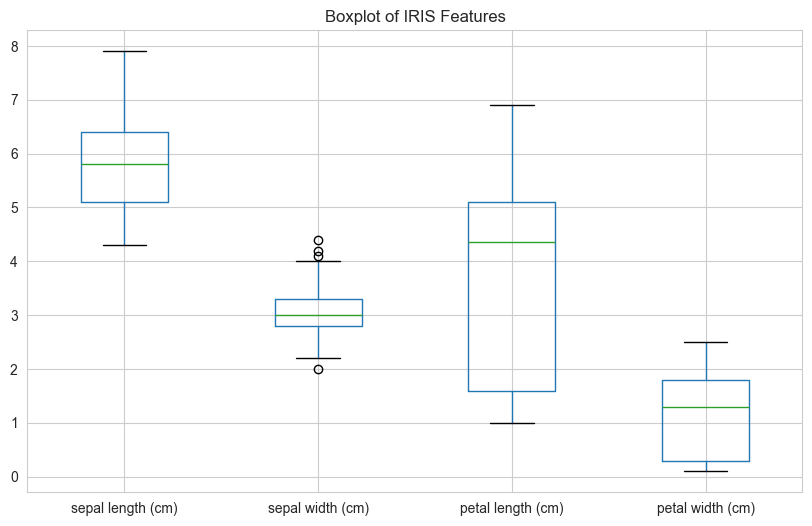

In [5]:
# Gerekli kütüphaneyi yüklüyoruz
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Kutu grafiği çizelim
def plot_boxplot(df):
    """
    IRIS veri seti için özelliklerin kutu grafiğini çizen bir fonksiyon.

    Parametreler:
        df (pd.DataFrame): Görselleştirilecek veri çerçevesi
    """
    # Veri setinde species sütunu varsa, grafiğe dahil etmemek için kaldırıyoruz
    if 'species' in df.columns:
        df = df.drop('species', axis=1)
    
    plt.figure(figsize=(10, 6))
    df.boxplot()
    plt.title('Boxplot of IRIS Features')
    plt.show()

# Veri setini yükleyelim ve species sütununu ekleyelim
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# species sütununu ekleyelim
iris_df['species'] = iris.target

# Kutu grafiği fonksiyonunu çalıştırıyoruz
plot_boxplot(iris_df)


In [ ]:
Histogram
Histogram, verinin dağılımını anlamamıza yardımcı olur. Özelliklerin her birine göre verilerin nasıl dağıldığını görebiliriz.

In [8]:
# Histogram çizelim
def plot_histogram(df):
    """
    IRIS veri seti için özelliklerin histogramını çizen bir fonksiyon.

    Parametreler:
        df (pd.DataFrame): Görselleştirilecek veri çerçevesi
    """
    # Veri setinde species sütunu varsa, grafiğe dahil etmemek için kaldırıyoruz
    if 'species' in df.columns:
        df = df.drop('species', axis=1)
    
    plt.figure(figsize=(10, 6))
    df.hist()
    plt.suptitle('Histogram of IRIS Features', x=0.5, y=1.02, ha='center', fontsize='large')
    plt.show()

Scatter Plot (Saçılım Grafiği)
Saçılım grafikleri iki özelliğin birbiriyle ilişkisini görselleştirmek için kullanılır. Bu sayede iki özelliğin birbiriyle nasıl ilişkili olduğunu görebiliriz.

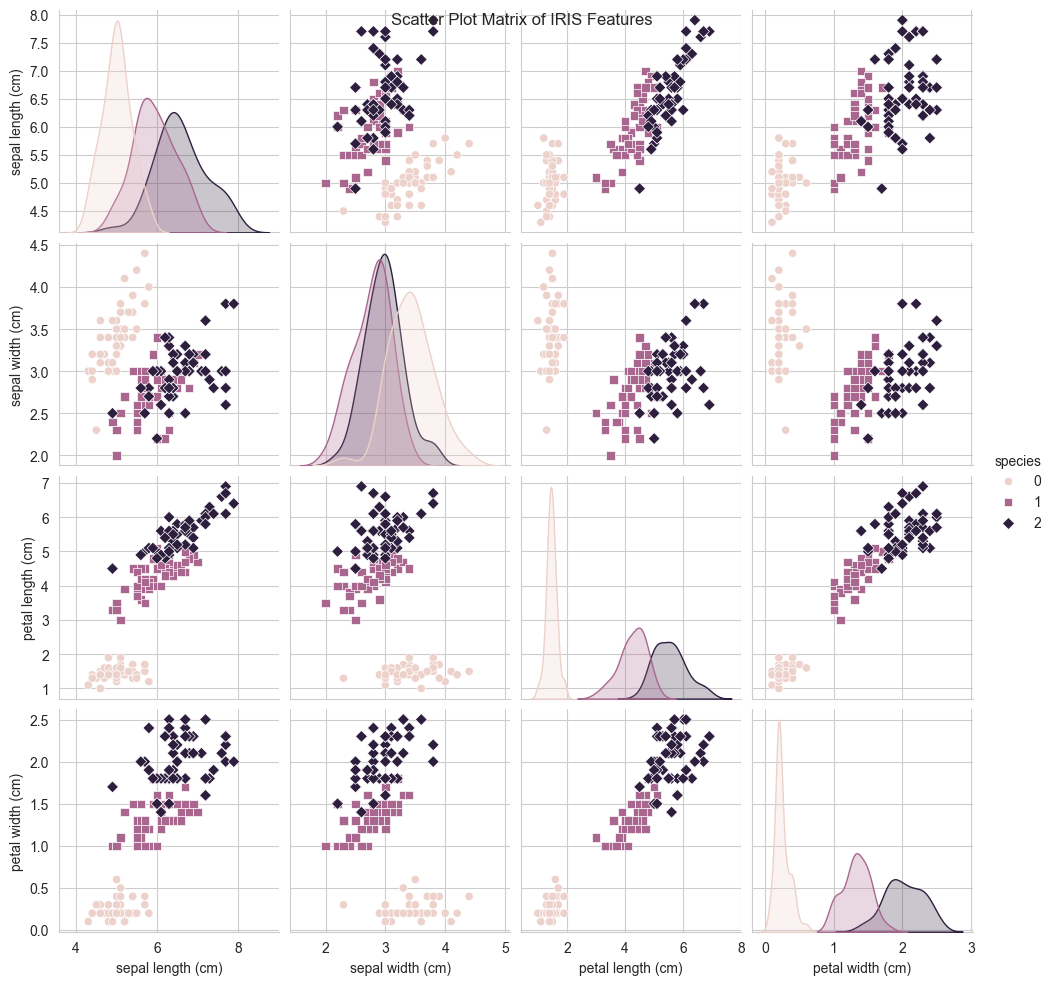

In [9]:
# Saçılım grafiği çizelim
import seaborn as sns

def plot_scatter_matrix(df):
    """
    IRIS veri seti için scatter matrix (dağılım matrisi) çizen bir fonksiyon.
    
    Parametreler:
        df (pd.DataFrame): Görselleştirilecek veri çerçevesi
    """
    sns.pairplot(df, hue="species", markers=["o", "s", "D"])
    plt.suptitle('Scatter Plot Matrix of IRIS Features')
    plt.show()

# Saçılım grafiğini çizelim
plot_scatter_matrix(pd.DataFrame(load_iris().data, columns=load_iris().feature_names).assign(species=load_iris().target))


### Bu Adımda Neler Yaptık?

#### `plot_boxplot()` Fonksiyonu:
Veri setinin her bir özelliği için kutu grafiği çiziyor. Bu grafik, verinin dağılımını ve uç değerleri anlamamızı sağlıyor.

#### `plot_histogram()` Fonksiyonu:
Her bir özelliğin histogramını çizerek, verinin nasıl dağıldığını gösteriyor.

#### `plot_scatter_matrix()` Fonksiyonu:
Özellikler arasındaki ilişkiyi görmek için dağılım grafiği oluşturuyoruz. Seaborn kütüphanesi ile özellikler arasındaki ilişkiyi daha net bir şekilde görebiliriz.

Bu adımları Jupyter Notebook'ta uyguladığında, hem veriyi analiz edebilir hem de görselleştirmeleri adım adım izleyebilirsin. Eğer buraya kadar her şey netse, bir sonraki adıma geçerek veri setini modellemeye başlayabiliriz!

### 3. Adım: Eğitim ve Test Seti Bölme (train_test_split)

In [10]:
# Gerekli kütüphaneleri yüklüyoruz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veri setini yüklüyoruz
iris = load_iris()
X = iris.data
y = iris.target

# Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression modelini oluşturuyoruz
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Test seti ile tahmin yapıyoruz
y_pred = model.predict(X_test)

# Modelin doğruluk oranını hesaplıyoruz
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


### accuracy\_score Nedir ve Neden Kullanıyoruz?
Eğittiğimiz modelin ne kadar iyi performans gösterdiğini anlamak için bir değerlendirme metrikine ihtiyacımız var. Doğruluk oranı (accuracy), makine öğrenmesi modellerinin başarımını değerlendirmek için kullanılan en temel metriklerden biridir.

## 1. Doğruluk (Accuracy) nedir?
Doğruluk oranı, modelimizin doğru tahmin ettiği örneklerin toplam tahminlere oranıdır. Yani, modelin test setindeki verileri ne kadar doğru sınıflandırdığını gösterir.

Formül olarak ifade edersek:
\[\text{Accuracy} = \frac{\text{Doğru Tahminler}}{\text{Toplam Tahminler}} \times 100\]
Örneğin, eğer modelimiz 10 test verisinden 9'unu doğru tahmin ederse, doğruluk oranı %90 olacaktır.

#### 2. Kodda Ne Oluyor?

```python
accuracy = accuracy_score(y_test, y_pred)
```
Bu satırda, modelimizin test setinde yaptığı tahminler (`y_pred`), gerçek etiketlerle (`y_test`) karşılaştırılıyor. `accuracy_score` fonksiyonu, doğru tahmin edilen örneklerin sayısını bulup, toplam test verisi sayısına bölerek doğruluk oranını hesaplar.

```python
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```

Özetle
Bu işlemi yaptık çünkü modelin ne kadar iyi performans gösterdiğini bilmek istiyoruz. Accuracy (doğruluk oranı), sınıflandırma modelleri için en yaygın kullanılan başarı ölçütlerinden biridir. Bu sayede, modelimizin test verilerinde ne kadar başarılı olduğunu ölçmüş oluyoruz.

Eğer doğruluk oranı düşük çıkarsa, modeli iyileştirme adımlarına (örneğin, farklı bir algoritma denemek veya daha fazla veri kullanmak) geçebiliriz. Doğruluk oranı yüksekse, modelimizin yeterince iyi performans gösterdiğini düşünebiliriz.



### train_test_split Parametreleri: `test_size` ve `random_state`

#### 1. test_size=0.3 Nedir?
`test_size`, veri setinin ne kadarını test seti olarak ayıracağımızı belirler. 
- `test_size=0.3` demek, veri setinin %30'unun test seti için ayrılacağı anlamına gelir. 
- Kalan %70 ise eğitim seti olarak kullanılır.

**Neden 0.3?**
- Veri bilimi projelerinde, veri seti genellikle %70/30 veya %80/20 oranında eğitim ve test olarak bölünür. 
- Bu, modelin yeterli miktarda veriyle eğitilmesini ve test edilmesini sağlar.

#### 2. random_state=42 Nedir?
`random_state`, veri setinin rastgele bölünmesini sabitler. Aynı kodu her çalıştırdığımızda aynı sonuçları elde edebilmemiz için bu parametre kullanılır. 
- `random_state=42` demek, her çalıştırmada aynı rastgele bölünmeyi sağlar.
- 42 sayısı, genellikle *Otostopçunun Galaksi Rehberi* kitabındaki popüler bir referans olarak seçilir, ancak teknik açıdan herhangi bir pozitif tamsayı kullanılabilir.

**Neden random_state Kullanıyoruz?**
- Aynı bölünmeyi tekrar edebilmek ve sonuçları karşılaştırabilmek için kullanıyoruz. Farklı bir `random_state` seçilse bile rastgelelik korunur, ancak bölünme farklı olur.


### 4. Adım: Cross-Validation (K-Fold)
Bir sonraki görevimiz, k-fold cross-validation yöntemini kullanarak modelin daha güvenilir bir şekilde performansını değerlendirmek olacak. Cross-validation, modelin veriye fazla uyum sağlamasını (overfitting) önlemek ve modelin farklı veri bölümlerinde nasıl performans gösterdiğini test etmek için kullanılır. Kısaca, veri setini birkaç farklı parçaya böleriz ve her defasında bir parça test, diğer parçalar eğitim için kullanılır.

In [16]:
# Gerekli kütüphaneleri yüklüyoruz
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression modelimizi tekrar oluşturuyoruz
model = LogisticRegression(max_iter=200)

# K-fold cross-validation uyguluyoruz (k=5, yani veri 5 parçaya bölünecek)
scores = cross_val_score(model, X, y, cv=5)

# Her bir fold için modelin doğruluk oranını gösteriyoruz
print("Cross-validation scores for each fold:", scores)

# Ortalama doğruluk oranını gösteriyoruz
print(f"Mean cross-validation accuracy: {scores.mean() * 100:.2f}%")


Cross-validation scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation accuracy: 97.33%


### StratifiedKFold Açıklaması

#### StratifiedKFold:

- **n\_splits=5**: Veri seti 5 parçaya bölünür ve her bir parçanın sınıf dağılımı, veri setinin genel sınıf dağılımına eşit olacak şekilde korunur.
- **Sınıf dengesinin korunması**: Özellikle sınıf sayısının dengesiz olduğu veri setlerinde, her fold'da (katmanda) sınıflar eşit şekilde dağıtılır.

#### Model Eğitimi ve Testi:

- Her fold için veri setini bölüp, modeli eğitim seti ile eğitiyor ve test seti ile doğruluk oranını hesaplıyoruz.

#### Ortalama Doğruluk Oranı:

- Tüm fold'lardaki doğruluk oranlarının ortalamasını hesaplıyoruz, böylece modelin genel performansını daha güvenilir bir şekilde ölçmüş oluyoruz.

#### Neden Stratified K-Fold Kullanıyoruz?

- Stratified K-Fold, sınıfların dengesiz olduğu veri setlerinde, her fold'da sınıfların eşit dağılımını sağladığı için daha doğru ve dengeli sonuçlar verir. Böylece modelin her fold'da farklı sınıf oranlarına göre eğitilmesinin önüne geçilir.

Bu adımda, stratified splitting kullanarak daha doğru bir model değerlendirmesi yaptık. Sıradaki adımlarda, modelin daha ileri analizleri veya model iyileştirmeleri üzerine odaklanabiliriz. Eğer buraya kadar netse, bir sonraki adımda neler yapmak istediğini belirleyelim!

### 5. Adım: Modelin Farklı Değerlendirme Metrikleri ile Analizi
Şimdi doğruluğun (accuracy) dışında başka metrikler de kullanarak modelin performansını değerlendirebiliriz. Makine öğrenmesi problemlerinde özellikle sınıflar arasında dengesizlik olduğunda, precision (kesinlik), recall (duyarlılık) ve f1-score gibi metrikler doğruluğa göre daha anlamlı olabilir. Aşağıda bu metriklerin ne anlama geldiğini ve bunları nasıl hesaplayacağımızı inceleyelim:from sklearn.metrics import precision_score, recall_score, f1_score

# Precision (Kesinlik) hesaplama
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

# Recall (Duyarlılık) hesaplama
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# F1-Score hesaplama
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

In [20]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

# Veri setini yüklüyoruz
iris = load_iris()
X = iris.data
y = iris.target

# Stratified K-Fold ile tekrar model eğitim ve testi yapacağız
# Modelin precision, recall ve f1-score gibi performans metriklerini göstereceğiz

# StratifiedKFold'u tekrar tanımlıyoruz (5 katmanlı cross-validation)
skf = StratifiedKFold(n_splits=5)

# Logistic Regression modelini tekrar oluşturuyoruz
model = LogisticRegression(max_iter=200)

# Her fold için sonuçları tutmak için bir liste
reports = []

# Stratified K-Fold ile eğitim ve test yapıyoruz
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Modeli eğitim verisi ile eğitiyoruz
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahmin yapıyoruz
    y_pred = model.predict(X_test)
    
    # Precision, Recall, F1-score hesaplama ve sonuçları saklama
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append(report)

# Ortalama Precision, Recall ve F1-score hesaplayalım
precision_avg = np.mean([r['weighted avg']['precision'] for r in reports])
recall_avg = np.mean([r['weighted avg']['recall'] for r in reports])
f1_avg = np.mean([r['weighted avg']['f1-score'] for r in reports])

# Sonuçları gösterelim
print(f"Average Precision: {precision_avg * 100:.2f}%")
print(f"Average Recall: {recall_avg * 100:.2f}%")
print(f"Average F1-Score: {f1_avg * 100:.2f}%")

Average Precision: 97.68%
Average Recall: 97.33%
Average F1-Score: 97.32%


### 6. Adım: Model İyileştirme Stratejileri
Modelin performansını iyileştirmek için deneyebileceğimiz birkaç yöntem var:

Hyperparametre Ayarlamaları (Hyperparameter Tuning)
Veri Ön İşleme ve Özellik Mühendisliği
Daha Karmaşık Modeller Kullanma
Düzenlileştirme (Regularization)
## 1. Hyperparametre Ayarlamaları (Hyperparameter Tuning)
Modelimizin performansını artırmak için kullandığımız modelin bazı parametrelerini GridSearchCV veya RandomizedSearchCV gibi yöntemlerle optimize edebiliriz. Logistic Regression modelinde C ve solver gibi parametreleri denemek oldukça yaygın bir stratejidir.

Şimdi bu adımda, GridSearchCV kullanarak hyperparameter tuning yapacağız.

GridSearchCV ile Hyperparameter Tuning

In [21]:
# Gerekli kütüphaneleri yüklüyoruz
from sklearn.model_selection import GridSearchCV

# Logistic Regression için denenecek hiperparametreler
param_grid = {
    'C': [0.1, 1, 10, 100],  # C parametresi, düzenlileştirme gücünü kontrol eder
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Farklı optimizasyon algoritmaları
}

# Logistic Regression modelini tanımlıyoruz
model = LogisticRegression(max_iter=200)

# GridSearchCV'yi tanımlıyoruz
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# GridSearchCV ile model eğitimini gerçekleştiriyoruz
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve bu parametrelerle elde edilen doğruluğu gösteriyoruz
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")


Best Parameters: {'C': 1, 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 97.50%


### Açıklamalar:

#### `param_grid`: C ve solver parametreleri için çeşitli değerler deniyoruz.

- **C**: Düzenlileştirme gücünü belirler. Daha düşük C değerleri, daha güçlü bir düzenlileştirme uygularken, daha büyük C değerleri düzenlileştirmeyi zayıflatır.
- **solver**: Farklı optimizasyon algoritmalarını deneriz ('newton-cg', 'lbfgs', 'liblinear').

#### `GridSearchCV`:

- `GridSearchCV`, her bir parametre kombinasyonu için modeli eğitir ve en iyi performansı veren kombinasyonu bulur.
- **`best_params_` ve `best_score_`**:
  - `GridSearchCV`'nin bulduğu en iyi parametreleri ve bu parametrelerle elde edilen doğruluğu gösterir.

### Veri Ön İşleme ve Özellik Mühendisliği

Bir modelin performansını artırmanın diğer yollarından biri de veri ön işleme ve özellik mühendisliği yapmaktır. Bu adımda veri setimizi daha temiz hale getirebilir veya mevcut özelliklerden yeni özellikler türetebiliriz. Örnek olarak:

- **Özelliklerin standardize edilmesi veya normalize edilmesi**: Özelliklerin farklı ölçüm birimlerinde olduğu durumlarda, verileri aynı ölçeklere getirmek modelin daha iyi sonuçlar vermesini sağlar.
- 

In [22]:
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli ölçeklenmiş verilerle eğitme
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Model Accuracy with Scaled Features: {accuracy_scaled * 100:.2f}%")


Model Accuracy with Scaled Features: 100.00%


### 3. Using More Complex Models

Beyond simple models like Logistic Regression, trying more complex models can improve performance. For example:

#### Random Forest
- **Random Forest**: Shows strong performance, especially with large datasets and complex structures.

#### Support Vector Machines (SVM)
- **Support Vector Machines (SVM)**: An algorithm that performs well, particularly with small datasets.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modeli oluşturuyoruz
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verisi ile eğitiyoruz
rf_model.fit(X_train, y_train)

# Test seti ile tahmin yapıyoruz
y_pred_rf = rf_model.predict(X_test)

# Random Forest modeli doğruluk oranı
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Model Accuracy: 100.00%


## 4. Düzenlileştirme (Regularization)
Logistic Regression modelinde L1 veya L2 düzenlileştirme kullanarak modelin aşırı öğrenmesini (overfitting) engelleyebiliriz. Aşağıdaki kodla, L2 düzenlileştirme kullanarak modeli iyileştirebiliriz:

In [24]:
# L2 düzenlileştirme uygulayan bir Logistic Regression modeli oluşturuyoruz
model = LogisticRegression(penalty='l2', C=1.0, max_iter=200)

# Modeli tekrar eğitip test edelim
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred)
print(f"L2 Regularized Logistic Regression Accuracy: {accuracy_l2 * 100:.2f}%")


L2 Regularized Logistic Regression Accuracy: 100.00%


# Model İyileştirme Stratejilerinin Özeti:
### Hyperparameter Tuning:
 Modelin performansını artırmak için doğru parametre kombinasyonlarını bulmak önemli.
### Veri Ön İşleme:
 Verileri ölçeklendirmek ve özellik mühendisliği yapmak modelin başarısını artırabilir.
### Daha Karmaşık Modeller:
 Logistic Regression'ın ötesinde daha güçlü modeller (Random Forest gibi) deneyebiliriz.
### Düzenlileştirme:
 Aşırı öğrenmeyi engellemek için L1 ve L2 düzenlileştirme yöntemlerini kullanabiliriz.

# 7. Adım: Model Performansını Daha Detaylı Analiz Etmek
Bir makine öğrenimi modelinin sadece doğrulukla değerlendirilmesi yeterli olmayabilir. Özellikle dengesiz veri setlerinde confusion matrix (karmaşıklık matrisi) ve ROC-AUC skoru gibi metrikler daha detaylı bir anlayış sunar.
## 1. Confusion Matrix (Karmaşıklık Matrisi)
Confusion Matrix, modelin doğru ve yanlış sınıflandırdığı örnekleri detaylı bir şekilde gösterir. Bu matriste:

## True Positives (TP): 
erçekten pozitif olan örneklerin doğru şekilde pozitif olarak sınıflandırılması.
## True Negatives (TN): 
erçekten negatif olan örneklerin doğru şekilde negatif olarak sınıflandırılması.
## False Positives (FP):
Gerçekten negatif olan örneklerin yanlış şekilde pozitif olarak sınıflandırılması.
## False Negatives (FN):
 Gerçekten pozitif olan örneklerin yanlış şekilde negatif olarak sınıflandırılması.
Aşağıda, confusion matrix ve heatmap ile bu matrisi görselleştirebiliriz:

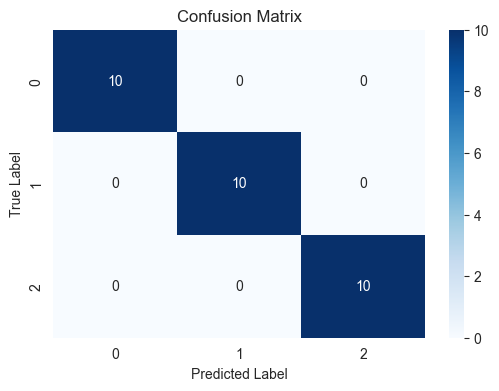

In [25]:
# Gerekli kütüphaneleri yüklüyoruz
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti için tahminleri yapıyoruz
y_pred = model.predict(X_test)

# Confusion matrix'i hesaplıyoruz
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# 2. ROC-AUC Skoru
ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), modelin sınıflandırma performansını özetleyen önemli bir metriktir. ROC eğrisi, modelin pozitif sınıfı doğru bir şekilde sınıflandırma yeteneğini ölçer. AUC skoru 1'e ne kadar yakınsa, model o kadar iyidir.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model wrapped in OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(max_iter=200))

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


# Açıklamalar:
## Confusion Matrix:
Bu matris, modelin hangi sınıflandırma hatalarını yaptığını gösterir. Yanlış pozitifler ve yanlış negatifler, modelin hangi tür hataları daha çok yaptığını anlamak için önemlidir.
## ROC-AUC Skoru:
AUC skoru 0 ile 1 arasında bir değere sahiptir. 1'e ne kadar yakınsa, model pozitif ve negatif sınıfları o kadar iyi ayırt edebiliyor demektir.
# 3. Modelin Test ve Eğitim Setinde Performans Karşılaştırması
Eğer model test verisine göre çok daha iyi sonuç veriyor, ancak eğitim verisinde kötü sonuçlar veriyorsa, bu overfitting (aşırı öğrenme) belirtisi olabilir. Tersine, eğer eğitim setinde yüksek performans gösteriyor ve test setinde kötü sonuçlar veriyorsa, bu underfitting (az öğrenme) olabilir.

Aşağıda eğitim ve test setleri için doğruluk oranlarını karşılaştıracağız:

In [34]:
# Eğitim setinde doğruluk
train_accuracy = model.score(X_train, y_train)

# Test setinde doğruluk
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 94.17%
Test Accuracy: 100.00%


# 4. Cross-Validation ile Modelin Genel Performansı
Eğitim ve test setlerinin doğruluklarını görmek önemlidir, ancak modelin genel performansını görmek için cross-validation yaparak tüm veri seti üzerinde modelin performansını değerlendirmeye devam edebiliriz. Daha önce Stratified K-Fold Cross-Validation ile yaptığımız gibi, yine aynı teknikle devam edebiliriz.

In [35]:
# StratifiedKFold ile model doğruluğunu çapraz doğrulama ile kontrol edelim
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

# Cross-validation sonuçlarını gösterelim
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Scores: [0.86666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 94.00%


# Bu Adımda Neler Yaptık?
Confusion Matrix ile modelin sınıflandırma hatalarını görselleştirdik ve analiz ettik.
ROC-AUC ile modelin pozitif sınıfı doğru bir şekilde sınıflandırma yeteneğini ölçtük.
Modelin eğitim ve test seti performansını karşılaştırarak overfitting veya underfitting durumlarını kontrol ettik.
Cross-Validation ile modelin genel performansını daha güvenilir bir şekilde ölçtük.



### Laboratuvar Görevlerini Tamamladık:

#### Veriyi Anlama ve Keşfetme:
- IRIS veri setinin temel istatistiksel özetini çıkardık.
- Boxplot, histogram ve scatter plot gibi grafiklerle veri setini görselleştirdik.

#### Eğitim ve Test Seti Bölme:
- Veri setini `train_test_split` ile eğitim ve test olarak böldük.
- Logistic Regression modelini eğitip doğruluk oranını hesapladık.

#### Cross-Validation (K-Fold):
- K-Fold Cross-Validation kullanarak modelin performansını daha güvenilir bir şekilde değerlendirdik.

#### Stratified Splitting:
- Stratified K-Fold kullanarak, sınıf dağılımını koruyarak veri setini bölüp model performansını karşılaştırdık.

#### Modelin Farklı Metriklerle Değerlendirilmesi:
- Precision, recall, f1-score gibi metriklerle model performansını daha detaylı inceledik.

#### Model İyileştirme:
- Hyperparameter tuning, regularization ve daha karmaşık modeller deneyerek modelin performansını artırmayı öğrendik.
- Cross-validation ile sonuçlarımızı daha güvenilir hale getirdik.

#### Model Performansını Gelişmiş Analiz Yöntemleri ile İnceleme:
- Confusion Matrix ve ROC-AUC gibi metriklerle modelin performansını daha derinlemesine analiz ettik.